In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
import povertymapping.ookla_data_proc as ookla

In [4]:
import sys

In [5]:
ookla_config = dict(
        save_path="../test_data/real_outputs/ookla_ph",
        repo_path="../data/SVII_PH_KH_MM_TL",
        data_dir="ph",
        country="ph",
        ookla_folder="ookla_ph",
        hdx_folder="hdx_ph",
        dhs_folder="dhs_ph",
        dhs_geo_zip_folder="PHGE71FL",
        dhs_zip_folder="PHHR71DT",
        crs="4683",
        ookla_feature="avg_d_mbps",
        boundary_file="phl_adminboundaries_candidate_adm3",
        year="2020",
        quarter="2",
        sample=False,
        random_sample=False,
        no_samples=60,
        random_seed=42,
        clust_rad=2000,
        plot_ookla_features=True,
        adm_level=3,
        use_pcode=True,
        shape_label='ADM3_PCODE',
        bins=6,
        show_legend=False,
    )

# you can also create a yaml file or json file
# and load it in.

In [6]:
from pathlib import Path

In [7]:
# uncomment and run the following to clear out the preprocessed files 
!rm -rf {ookla_config['save_path']}
!mkdir -p {ookla_config['save_path']}

In [8]:
cluster_coords_path = Path(ookla_config['save_path'])/'..'/ookla_config['dhs_folder']/f"{ookla_config['dhs_geo_zip_folder']}_cluster_coords.csv"

In [9]:
!cp {cluster_coords_path} {ookla_config['save_path']}/.

In [10]:
%%time
ookla.process_ookla_data(ookla_config)

Adding buffer geometry...


100%|███████████████████████████████████████████████████████████████████████████████| 1250/1250 [00:28<00:00, 44.02it/s]
/home/butchtm/work/povmap/unicef-ai4d-poverty-mapping/povertymapping/utils/data_utils.py:449: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  geometry_and_cluster_features.groupby(group_indices).mean().reset_index()
/home/butchtm/work/povmap/unicef-ai4d-poverty-mapping/env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


CPU times: user 2min 48s, sys: 5.09 s, total: 2min 53s
Wall time: 2min 52s


<Figure size 1200x1000 with 0 Axes>

Check that the preprocessed files have been created

In [11]:
ookla_df_path = Path(ookla_config['save_path'])/f"{ookla_config['country']}_{ookla_config['year']}_{ookla_config['quarter']}_{ookla_config['ookla_feature']}.csv"

In [12]:
ookla_df = pd.read_csv(ookla_df_path)

In [13]:
len(ookla_df)

988

In [14]:
ookla_df.head()

,Unnamed: 0,DHSID,avg_d_mbps
0,0,PH201700000001,0.765000
1,1,PH201700000002,9.036353
2,2,PH201700000003,4.830000
3,3,PH201700000006,3.074000
4,4,PH201700000008,2.254000


In [15]:
use_pcode = ookla_config["use_pcode"]
adm_level = ookla_config["adm_level"]
if use_pcode:
    aggregate = f"pcode_adm{adm_level}"       
else:
    aggregate = ookla_config["shape_label"]


In [16]:
ookla_by_adm_gdf_path = Path(ookla_config['save_path'])/f"{ookla_config['country']}_{ookla_config['year']}_{ookla_config['quarter']}_{ookla_config['ookla_feature']}_by_{aggregate.lower()}.geojson"

In [17]:
ookla_by_adm_gdf = gpd.read_file(ookla_by_adm_gdf_path)

In [18]:
len(ookla_by_adm_gdf)

1647

In [19]:
ookla_by_adm_gdf.head()

,ADM3_PCODE,ADM3_EN,DHSYEAR,DHSCLUST,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,DHSREGCO,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,avg_d_mbps,index_right,Shape_Leng,Shape_Area,geometry
0,PH175301000,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.58201 9.37821, 118.58250 9..."
1,PH175101000,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((120.58273 13.50342, 120.58281 13.503..."
2,PH030801000,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((120.49737 14.75766, 120.49755 14.757..."
3,PH021501000,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((121.43328 18.46824, 121.43375 18.468..."
4,PH083701000,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((125.02540 10.73615, 125.02538 ..."


In [20]:
len(ookla_by_adm_gdf)

1647

In [21]:
ookla_by_adm_gdf.avg_d_mbps.isna().sum()

870

In [22]:
if use_pcode:
    group_indices = [f"ADM{adm_level}_PCODE", f"ADM{adm_level}_EN"]
else:
    group_indices = [ookla_config["shape_label"]]


In [23]:
with_data = ookla_by_adm_gdf[ookla_by_adm_gdf.avg_d_mbps.notna()][[*group_indices,'DHSCLUST',ookla_config['ookla_feature'],'geometry']] 
with_data.head()

,ADM3_PCODE,ADM3_EN,DHSCLUST,avg_d_mbps,geometry
6,PH045601000,Agdangan,639.000000,15.696154,"MULTIPOLYGON (((121.94761 13.85273, 121.94751 ..."
7,PH025701000,Aglipay,486.500000,11.582727,"POLYGON ((121.63135 16.52881, 121.63389 16.524..."
11,PH015502000,Aguilar,433.000000,12.187444,"POLYGON ((120.26777 15.91026, 120.26860 15.909..."
12,PH142708000,Aguinaldo,122.000000,3.860500,"POLYGON ((121.45459 17.01971, 121.45476 17.019..."
15,PH150708000,Akbar,4.666667,7.484673,"MULTIPOLYGON (((122.26185 6.61928, 122.26177 6..."


In [24]:
len(with_data)

777

In [25]:
orig_ookla_gdf_path = Path(ookla_config['repo_path'])/ookla_config['data_dir']/ookla_config['ookla_folder']/f"{ookla_config['country']}_{ookla_config['year']}_{ookla_config['quarter']}_ookla.geojson"

In [26]:
orig_ookla_gdf = gpd.read_file(orig_ookla_gdf_path)

In [27]:
orig_ookla_gdf.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_right,Shape_Leng,Shape_Area,ADM3_EN,...,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,1323031202322123,13582,10354,35,1541,193,365,1.122377,0.022095,City of Antipolo,...,Rizal,PH045800000,Region IV-A,PH040000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((121.13939 14.63293, 121.14488 14.632..."
1,1323031202322010,28972,30631,16,1393,199,365,1.122377,0.022095,City of Antipolo,...,Rizal,PH045800000,Region IV-A,PH040000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((121.12291 14.64887, 121.12840 14.648..."
2,1323031220101330,18241,19322,29,2613,314,365,1.122377,0.022095,City of Antipolo,...,Rizal,PH045800000,Region IV-A,PH040000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((121.18883 14.57445, 121.19432 14.574..."
3,1323031220101133,29976,38282,8,117,22,365,1.122377,0.022095,City of Antipolo,...,Rizal,PH045800000,Region IV-A,PH040000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((121.19432 14.59040, 121.19981 14.590..."
4,1323031220101310,20309,24576,24,4623,603,365,1.122377,0.022095,City of Antipolo,...,Rizal,PH045800000,Region IV-A,PH040000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((121.18883 14.58508, 121.19432 14.585..."


In [28]:
orig_ookla_gdf["avg_d_mbps"] = orig_ookla_gdf["avg_d_kbps"]/1000
orig_ookla_gdf["avg_u_mbps"] = orig_ookla_gdf["avg_u_kbps"]/1000

In [29]:
import matplotlib.pyplot as plt

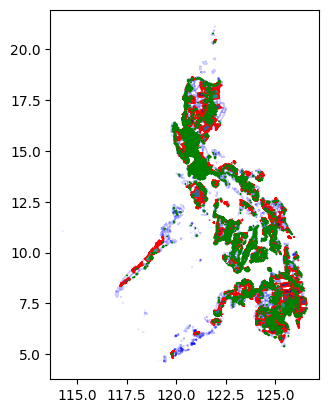

In [30]:
ax = plt.axes()
ax = ookla_by_adm_gdf.plot(facecolor='none',ax=ax,edgecolor='blue', alpha=0.2)
ax = with_data.plot(column='avg_d_mbps',edgecolor='red', ax=ax)
ax = orig_ookla_gdf.plot(column='avg_d_mbps',edgecolor='green', ax=ax)

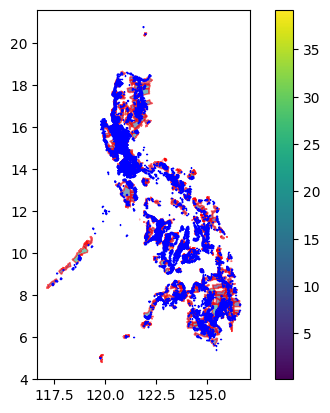

In [31]:
ax = plt.axes()
ax = with_data.plot(column='avg_d_mbps',edgecolor='red', ax=ax, legend=True, alpha=0.6)
ax = orig_ookla_gdf.plot(column='avg_d_mbps',edgecolor='blue', ax=ax)

In [32]:
img_path = (Path(ookla_config['save_path'])/f'{ookla_config["boundary_file"]}_{ookla_config["ookla_feature"]}.jpeg').as_posix(); img_path

'../test_data/real_outputs/ookla_ph/phl_adminboundaries_candidate_adm3_avg_d_mbps.jpeg'

In [33]:
from PIL import Image

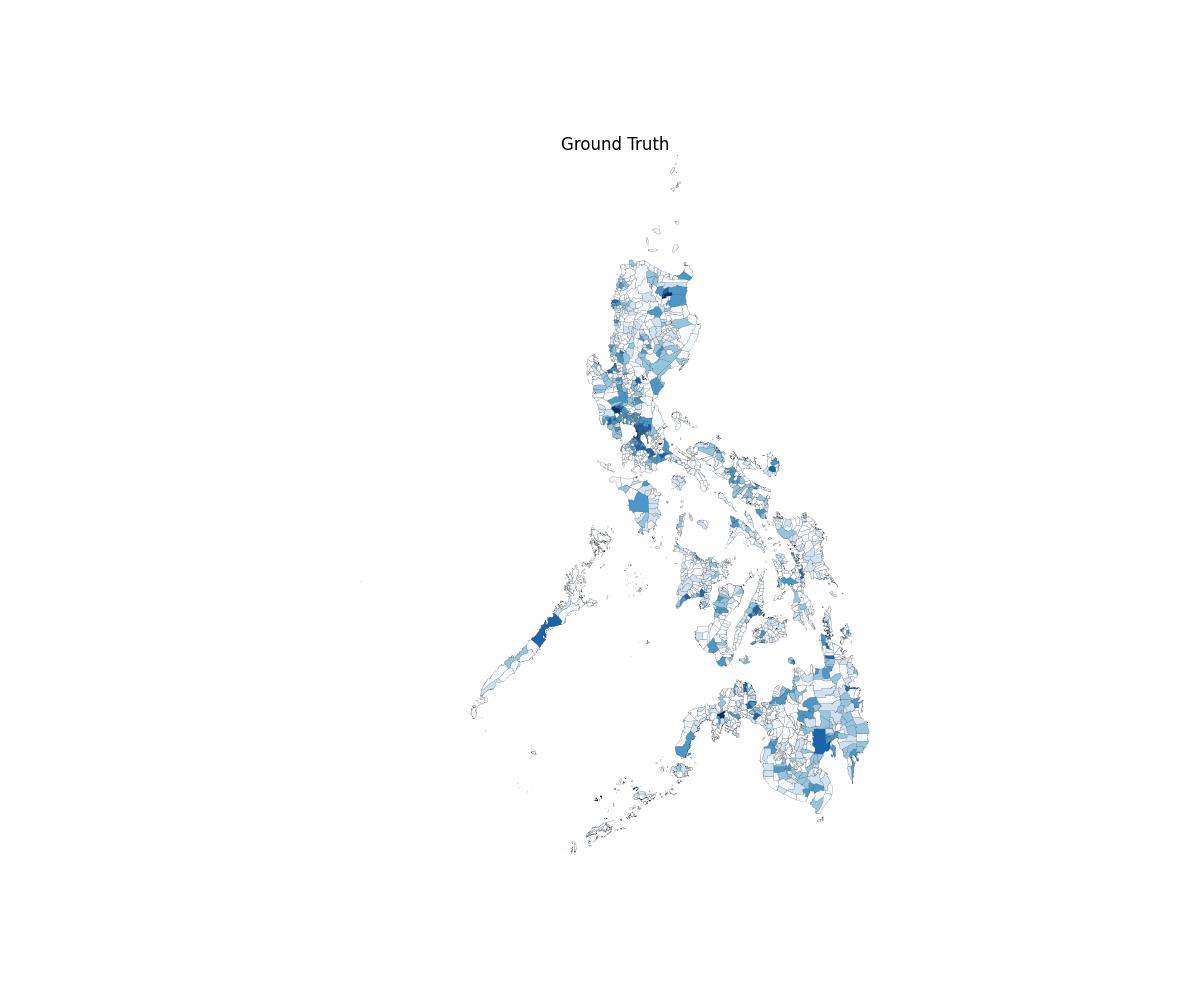

In [34]:
img = Image.open(img_path); img

In [35]:
dhs_by_cluster_path = Path(ookla_config['save_path'])/'..'/ookla_config['dhs_folder']/f"{ookla_config['dhs_zip_folder']}_{ookla_config['dhs_geo_zip_folder']}_by_cluster.geojson"

In [36]:
dhs_by_cluster = gpd.read_file(dhs_by_cluster_path)

In [37]:
len(dhs_by_cluster)

1249

In [38]:
dhs_by_cluster.columns.values

array(['DHSCLUST', 'Wealth Index', 'DHSID', 'DHSCC', 'DHSYEAR', 'CCFIPS',
       'ADM1FIPS', 'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS',
       'ADM1NAME', 'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA',
       'LATNUM', 'LONGNUM', 'ALT_GPS', 'ALT_DEM', 'DATUM', 'geometry'],
      dtype=object)

In [39]:
dhs_data = dhs_by_cluster[["DHSCLUST","DHSID","Wealth Index","geometry","LATNUM","LONGNUM"]].copy()
dhs_data.head()

,DHSCLUST,DHSID,Wealth Index,geometry,LATNUM,LONGNUM
0,1,PH201700000001,-31881.608696,POINT (122.10981 6.67465),6.674652,122.109807
1,2,PH201700000002,-2855.375000,POINT (122.13203 6.66226),6.662256,122.132027
2,3,PH201700000003,-57647.047619,POINT (122.17950 6.62182),6.621822,122.179496
3,4,PH201700000004,-54952.666667,POINT (122.13797 6.48530),6.485298,122.137965
4,5,PH201700000005,-77819.160000,POINT (0.00000 0.00000),0.000000,0.000000


In [40]:
dhs_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
from povertymapping.utils.data_utils import add_buffer_geom

In [42]:
add_buffer_geom(dhs_data, r=ookla_config['clust_rad'])

Adding buffer geometry...


100%|███████████████████████████████████████████████████████████████████████████████| 1249/1249 [00:30<00:00, 41.20it/s]


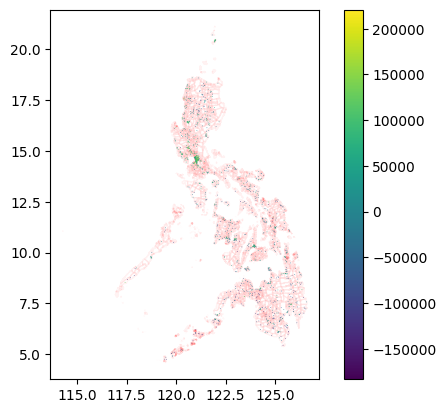

In [47]:
ax = plt.axes()
ax= ookla_by_adm_gdf.plot(facecolor='none',ax=ax,edgecolor='red', alpha=0.05)
ax = dhs_data.plot(column="Wealth Index", ax=ax, legend=True)